Categorias de Imagens



In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.utils import to_categorical
import numpy as np

In [2]:
dataset = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
dataset[0][0].shape

(60000, 28, 28)

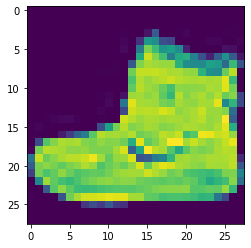

In [6]:
plt.imshow(dataset[0][0][0])

In [11]:
qtd_amostras = len(dataset[0][0])
qtd_linhas = dataset[0][0][0].shape[0]
qtd_colunas = dataset[0][0][0].shape[1]
                         
x_treino = dataset[0][0].reshape(qtd_amostras, qtd_linhas*qtd_colunas)

In [12]:
qtd_amostras = len(dataset[1][0])
qtd_linhas = dataset[1][0][0].shape[0]
qtd_colunas = dataset[1][0][0].shape[1]
                         
x_teste = dataset[1][0].reshape(qtd_amostras, qtd_linhas*qtd_colunas)

In [13]:
x_treino.shape

(60000, 784)

In [14]:
x_teste.shape

(10000, 784)

In [15]:
y_treino = dataset[0][1]
y_teste = dataset[1][1]

In [19]:
y_treino_categ = to_categorical(y_treino,len(np.unique(y_treino)))

In [20]:
y_teste_categ = to_categorical(y_teste,len(np.unique(y_teste)))

In [23]:
model = Sequential()
model.add(Input(shape=(qtd_linhas*qtd_colunas,)))
model.add(Dense(144, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(len(np.unique(y_treino)), activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 144)               113040    
                                                                 
 dense_3 (Dense)             (None, 100)               14500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 128,550
Trainable params: 128,550
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
tentativa_1 = model.fit(x_treino, y_treino_categ, validation_data = (x_teste,y_teste_categ ), epochs=20, batch_size = 1000)

Epoch 1/20
60/60 [==============================] - 4s 63ms/step - loss: 1.0035 - accuracy: 0.6942 - val_loss: 1.1076 - val_accuracy: 0.6744
Epoch 2/20
60/60 [==============================] - 4s 62ms/step - loss: 0.8521 - accuracy: 0.7056 - val_loss: 0.9312 - val_accuracy: 0.7049
Epoch 3/20
60/60 [==============================] - 3s 55ms/step - loss: 0.7667 - accuracy: 0.7223 - val_loss: 0.9085 - val_accuracy: 0.7216
Epoch 4/20
60/60 [==============================] - 3s 55ms/step - loss: 0.7076 - accuracy: 0.7327 - val_loss: 0.8535 - val_accuracy: 0.7297
Epoch 5/20
60/60 [==============================] - 4s 62ms/step - loss: 0.6687 - accuracy: 0.7444 - val_loss: 0.8400 - val_accuracy: 0.7507
Epoch 6/20
60/60 [==============================] - 4s 66ms/step - loss: 0.6463 - accuracy: 0.7550 - val_loss: 0.8500 - val_accuracy: 0.7465
Epoch 7/20
60/60 [==============================] - 4s 63ms/step - loss: 0.6195 - accuracy: 0.7661 - val_loss: 0.8726 - val_accuracy: 0.7506
Epoch 8/20
60

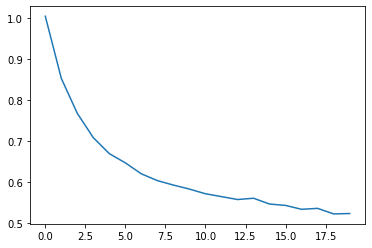

In [33]:
plt.plot(tentativa_1.history['loss'])

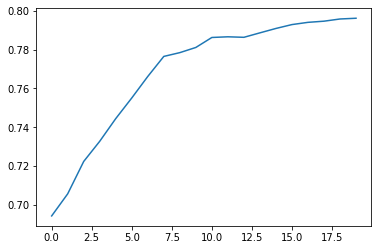

In [34]:
plt.plot(tentativa_1.history['accuracy'])

In [35]:
x_treino_norm = x_treino/255

In [36]:
x_teste_norm = x_teste/255

Modelo 2 = Modelo Categorico com dados normalizados

In [37]:
model_2 = Sequential()
model_2.add(Input(shape=(qtd_linhas*qtd_colunas,)))
model_2.add(Dense(144, activation='relu'))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(len(np.unique(y_treino)), activation='softmax'))

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 144)               113040    
                                                                 
 dense_6 (Dense)             (None, 100)               14500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 128,550
Trainable params: 128,550
Non-trainable params: 0
_________________________________________________________________


In [39]:
model_2.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
tentativa_2 = model_2.fit(x_treino_norm, y_treino_categ, validation_data = (x_teste_norm,y_teste_categ ), epochs=20, batch_size = 1000)

Epoch 1/20
60/60 [==============================] - 2s 32ms/step - loss: 0.8738 - accuracy: 0.6983 - val_loss: 0.6142 - val_accuracy: 0.7826
Epoch 2/20
60/60 [==============================] - 2s 29ms/step - loss: 0.5615 - accuracy: 0.7993 - val_loss: 0.5196 - val_accuracy: 0.8141
Epoch 3/20
60/60 [==============================] - 1s 20ms/step - loss: 0.4907 - accuracy: 0.8238 - val_loss: 0.4596 - val_accuracy: 0.8372
Epoch 4/20
60/60 [==============================] - 1s 19ms/step - loss: 0.4471 - accuracy: 0.8399 - val_loss: 0.4988 - val_accuracy: 0.8147
Epoch 5/20
60/60 [==============================] - 1s 19ms/step - loss: 0.4186 - accuracy: 0.8457 - val_loss: 0.4292 - val_accuracy: 0.8420
Epoch 6/20
60/60 [==============================] - 1s 19ms/step - loss: 0.3924 - accuracy: 0.8555 - val_loss: 0.4390 - val_accuracy: 0.8430
Epoch 7/20
60/60 [==============================] - 1s 19ms/step - loss: 0.3729 - accuracy: 0.8640 - val_loss: 0.4057 - val_accuracy: 0.8522
Epoch 8/20
60

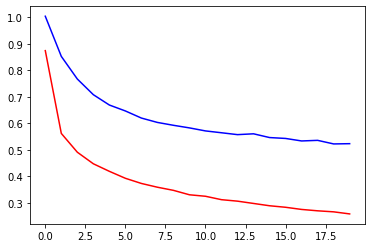

In [43]:
plt.plot(tentativa_1.history['loss'], '-b')
plt.plot(tentativa_2.history['loss'], '-r')

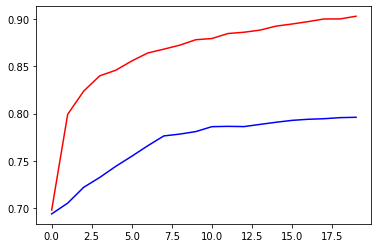

In [44]:
plt.plot(tentativa_1.history['accuracy'], '-b')
plt.plot(tentativa_2.history['accuracy'], '-r')